# Random forest classifier for NMD prediction

In [168]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error


from numpy import sort
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [169]:
negative_df = pd.read_csv('negative_set_down_and_insign.csv', index_col = 0)
positive_df = pd.read_csv('long_read_sleuth_dKD_up_filtered_features.csv', index_col = 0)

In [170]:
negative_df.describe()

,start_ORF,end_ORF,exon_with_stop_length,last_exon_length,t_length,distance_stop_EJC,50_nt,stop_TGA,stop_TAA,3_UTR_length,...,4th_stop_C,4th_stop_G,4th_stop_T,GC_perc_30_bp_round_stop,GC_perc_up_15_bp_stop,GC_perc_down_15_bp_stop,nr_exons_in_transcript,nr_exons_in_3prime,UPF1_motifs_in3prime_total,UPF1_motifs_in3prime_relative
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,...,3274.000000,3274.000000,3274.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,258.937843,1255.502742,1074.448507,1260.667276,2632.665448,116.495430,0.322364,0.532297,0.257465,1377.162706,...,0.209835,0.304826,0.186011,0.478428,0.508755,0.448101,9.274528,2.656612,5.542048,0.004346
std,343.481490,1250.825830,1515.871895,1603.216657,2229.748535,850.397276,0.467453,0.499032,0.437304,1697.456839,...,0.407253,0.460404,0.389175,0.131035,0.152329,0.155042,7.421265,3.693037,7.463835,0.004252
min,0.000000,62.000000,22.000000,8.000000,191.000000,-6874.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,81.000000,442.000000,188.250000,279.000000,984.000000,-156.750000,0.000000,0.000000,0.000000,324.000000,...,0.000000,0.000000,0.000000,0.366667,0.400000,0.333333,4.000000,1.000000,1.000000,0.001591
50%,173.000000,855.500000,491.000000,669.000000,1996.500000,-61.000000,0.000000,1.000000,0.000000,771.000000,...,0.000000,0.000000,0.000000,0.466667,0.533333,0.466667,7.000000,1.000000,3.000000,0.003586
75%,321.000000,1676.750000,1344.500000,1639.750000,3516.750000,207.750000,1.000000,1.000000,1.000000,1793.500000,...,0.000000,1.000000,0.000000,0.566667,0.600000,0.533333,12.000000,3.000000,7.000000,0.006167
max,5424.000000,15984.000000,19780.000000,19780.000000,21679.000000,9578.000000,1.000000,1.000000,1.000000,19698.000000,...,1.000000,1.000000,1.000000,0.866667,1.000000,0.866667,78.000000,41.000000,110.000000,0.071429


In [171]:
positive_df.describe()

,start_ORF,end_ORF,exon_with_stop_length,last_exon_length,t_length,distance_stop_EJC,50_nt,stop_TGA,stop_TAA,3_UTR_length,...,4th_stop_C,4th_stop_G,4th_stop_T,GC_perc_30_bp_round_stop,GC_perc_up_15_bp_stop,GC_perc_down_15_bp_stop,nr_exons_in_transcript,nr_exons_in_3prime,UPF1_motifs_in3prime_total,UPF1_motifs_in3prime_relative
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,...,3268.000000,3268.000000,3268.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,213.706277,994.913772,444.546923,911.954601,2432.723339,525.854966,0.706886,0.564595,0.239793,1437.809567,...,0.210220,0.266524,0.199510,0.473146,0.503047,0.443246,11.327544,5.370201,5.510055,0.004196
std,265.569371,1180.577516,931.297514,1380.634305,2102.036620,894.676115,0.455260,0.495886,0.427022,1660.265204,...,0.407527,0.442209,0.399693,0.117005,0.145617,0.137770,8.649829,5.729640,6.693357,0.004026
min,0.000000,62.000000,22.000000,3.000000,265.000000,-6216.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,1.000000,1.000000,0.000000,0.000000
25%,65.000000,358.250000,109.000000,163.000000,891.000000,-5.000000,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.400000,0.400000,0.333333,5.000000,1.000000,1.000000,0.001791
50%,143.000000,611.000000,163.000000,424.000000,1849.500000,290.500000,1.000000,1.000000,0.000000,881.500000,...,0.000000,0.000000,0.000000,0.466667,0.533333,0.466667,9.000000,4.000000,3.000000,0.003488
75%,275.000000,1213.250000,344.000000,1143.000000,3199.750000,772.000000,1.000000,1.000000,0.000000,2005.250000,...,0.000000,1.000000,0.000000,0.566667,0.600000,0.533333,15.000000,7.000000,8.000000,0.005778
max,5731.000000,15239.000000,23264.000000,23264.000000,25280.000000,10035.000000,1.000000,1.000000,1.000000,21633.000000,...,1.000000,1.000000,1.000000,0.866667,0.933333,0.866667,105.000000,62.000000,64.000000,0.066667


In [172]:
#Label
negative_df['NMD_sensitivity'] = 0
positive_df['NMD_sensitivity'] = 1

In [173]:
NMD_features_df =pd.concat([negative_df, positive_df], axis=0, join='outer')
NMD_features_df.columns

Index(['name_tar', 'start_ORF', 'end_ORF', 'exon_with_stop_length',
       'last_exon_length', 't_length', 'distance_stop_EJC', 'ORF_id', '50_nt',
       'stop_TGA', 'stop_TAA', '3_UTR_length', '5_UTR_length',
       'distance_stop_from_start', 'stop_150bp_from_start', '4th_stop_C',
       '4th_stop_G', '4th_stop_T', 'GC_perc_30_bp_round_stop',
       'GC_perc_up_15_bp_stop', 'GC_perc_down_15_bp_stop',
       'nr_exons_in_transcript', 'nr_exons_in_3prime',
       'UPF1_motifs_in3prime_total', 'UPF1_motifs_in3prime_relative',
       'NMD_sensitivity'],
      dtype='object')

In [174]:
NMD_features_df.dropna(inplace=True)
X = NMD_features_df.drop(['name_tar',  'GC_perc_30_bp_round_stop', 
                           'ORF_id', 'NMD_sensitivity'], axis=1)
y = pd.DataFrame(NMD_features_df['NMD_sensitivity'])

y_encoded = OrdinalEncoder().fit_transform(y)

X['start_ORF'] = X['start_ORF']/X['t_length']
X['end_ORF'] = X['end_ORF']/X['t_length']

#normlaize X
for variable in ['exon_with_stop_length',
       'last_exon_length', 't_length', 'distance_stop_EJC',
       '3_UTR_length', '5_UTR_length',
       'distance_stop_from_start', 
        'GC_perc_up_15_bp_stop', 'GC_perc_down_15_bp_stop',
       'nr_exons_in_transcript', 'nr_exons_in_3prime',
       'UPF1_motifs_in3prime_total' ]:
    X[variable]=(X[variable]-X[variable].mean())/X[variable].std()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [175]:
model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

Accuracy: 0.6845
RMSE of the base model: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Feature selection

In [176]:
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 predictions = selection_model.predict(select_X_test)
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
 rmse = mean_squared_error(y_test, y_pred, squared=False)
 print(f"RMSE: {rmse:.3f}")

Thresh=0.000, n=22, Accuracy: 68.45%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=22, Accuracy: 68.45%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.030, n=20, Accuracy: 68.45%
RMSE: 0.562
Thresh=0.033, n=19, Accuracy: 68.91%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.034, n=18, Accuracy: 70.05%
RMSE: 0.562
Thresh=0.034, n=17, Accuracy: 68.98%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.036, n=16, Accuracy: 69.06%
RMSE: 0.562
Thresh=0.036, n=15, Accuracy: 68.75%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.038, n=14, Accuracy: 69.52%
RMSE: 0.562
Thresh=0.038, n=13, Accuracy: 69.29%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.039, n=12, Accuracy: 69.90%
RMSE: 0.562
Thresh=0.039, n=11, Accuracy: 69.14%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.040, n=10, Accuracy: 68.91%
RMSE: 0.562
Thresh=0.040, n=9, Accuracy: 69.37%
RMSE: 0.562
Thresh=0.041, n=8, Accuracy: 69.67%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.041, n=7, Accuracy: 70.13%
RMSE: 0.562
Thresh=0.043, n=6, Accuracy: 69.75%
RMSE: 0.562
Thresh=0.045, n=5, Accuracy: 69.60%
RMSE: 0.562
Thresh=0.051, n=4, Accuracy: 70.21%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared'

Thresh=0.065, n=3, Accuracy: 70.05%
RMSE: 0.562
Thresh=0.076, n=2, Accuracy: 67.76%
RMSE: 0.562
Thresh=0.201, n=1, Accuracy: 68.60%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [165]:
len(thresholds)


22

In [177]:
selection = SelectFromModel(model, threshold=thresholds[4], prefit=True)
select_X_train = selection.transform(X_train)
 # train model
selection_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
selection_model.fit(select_X_train, y_train)
 # eval model
select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.3f}")

Thresh=0.201, n=18, Accuracy: 70.05%
RMSE: 0.562


/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/christina/miniforge3/envs/pygtftk/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


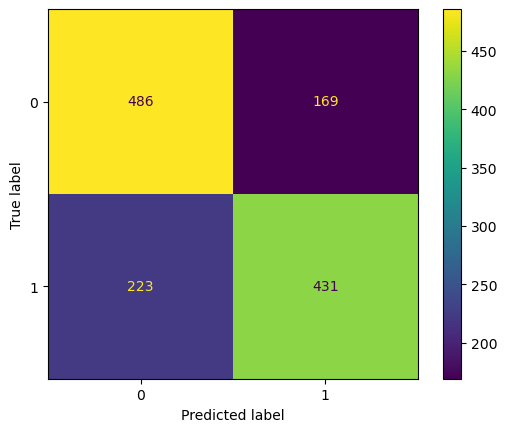

In [178]:
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Hyperparameter tuning

## Randomized search


In [152]:
# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.3, 0.7),
    'n_estimators':randint(50, 200)
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(select_X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best set of hyperparameters:  {'learning_rate': 0.07630533654866012, 'max_depth': 4, 'n_estimators': 96, 'subsample': 0.7427598967900048}
Best score:  0.7070519247380752


In [153]:
xgb_model = XGBClassifier(**random_search.best_params_)
xgb_model.fit(select_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07630533654866012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=96, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

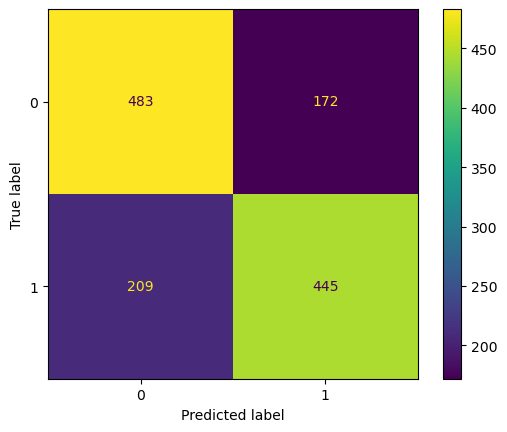

In [154]:
# Generate predictions with the best model
y_pred = xgb_model.predict(select_X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [155]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7089381207028266
